<h1>UK ACCIDENT REPORT DATA ANALYSIS</h1>

<h3>ANALYST: DENNIS KARL S. DOMANAIS</h3>

<h1>IMPORTING LIBRARIES NEEDED</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>IMPORTING DATASETS</h1>

In [2]:
accident = pd.read_csv("accident_data.csv")

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>CONVERT COLUMNS TO ITS APPROPRIATE DATA TYPE</h1>

In [7]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category') 
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [8]:
accident.dtypes

Index                      category
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [9]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst =True, errors = 'coerce')
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>DETERMINING NULL VALUES AND FILLNG THEM</h1>

<h4>DETERMING NULLS</h4>

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [12]:
accident['Year']=accident['Accident Date'].dt.year
accident['Month']=accident['Accident Date'].dt.month
accident['Day']=accident['Accident Date'].dt.day
accident['DayofWeek']=accident['Accident Date'].dt.dayofweek
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

<h1 style="background-color:#252525; height:500; font-size:100; color:orange; font-weight:bold; padding:10px; text-align:center;">INSIGHTS</h1>

<h1>INSIGHT #1</h1>

<h3>What vehicle type is most frequently involved in accidents?</h3>

<h3 style="background-color:yellow;">The most common or dominant vehicle type involved in accidents is Car, indicating a higher likelihood of road incidents compared to other vehicle types.</h3>
<hr>

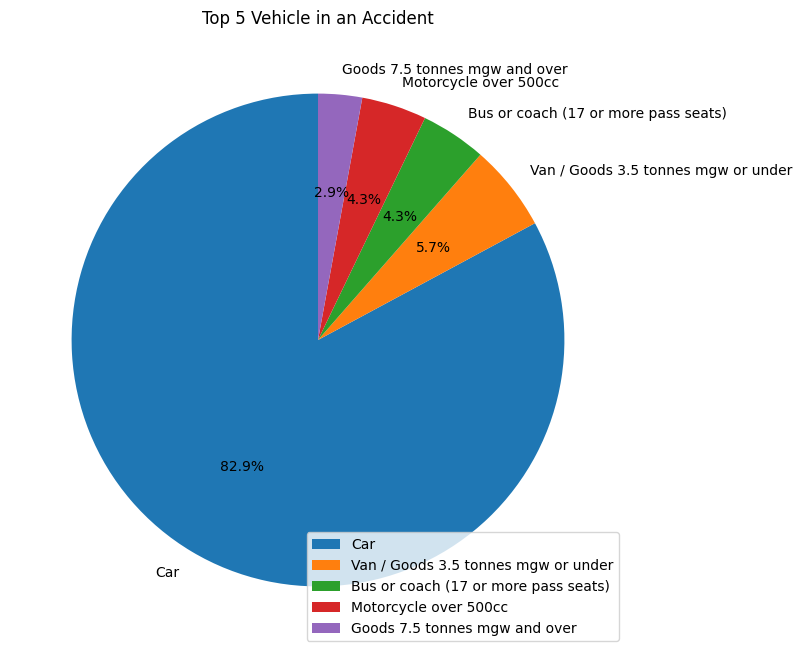

In [51]:


top_5_vehicle_types = vehicle_types.head(5)
plt.figure(figsize=(8, 8)) 
plt.pie(top_5_vehicle_types['Count'], labels=top_5_vehicle_types['Vehicle_Type'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Vehicle in an Accident')
plt.legend()
plt.show()


<h1>INSIGHT #2</h1>

<h3>On which road type do most car accidents occur?</h3>

<h3 style="background-color:yellow;">Most car accidents occur on single carriageways, likely due to high traffic volume, lack of dividers, and frequent intersections.</h3>

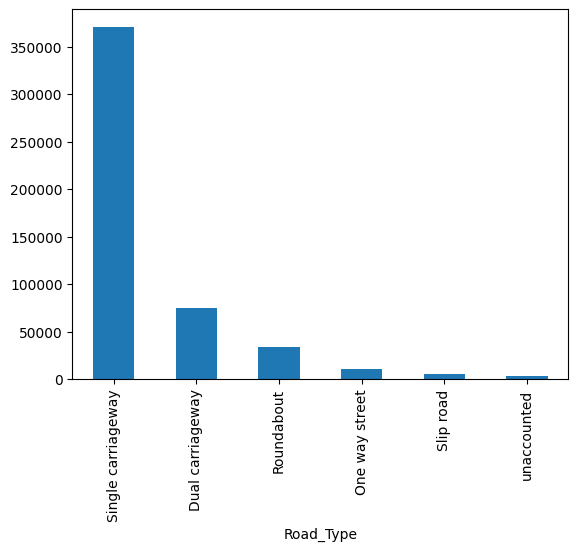

In [52]:
car_accidents = accident[accident['Vehicle_Type'] == 'Car']
road_type_counts = car_accidents['Road_Type'].value_counts()
road_type_counts.plot(kind='bar')
plt.show()

<h1>INSIGHT #3</h1>

<h3 style="background-color:yellow;">Most car accidents occur on dry roads, suggesting that factors was the Driver, like overspeeding or distracted.</h3>


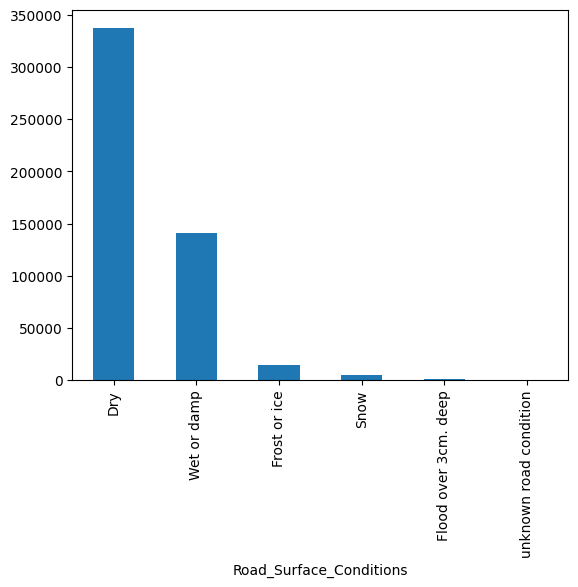

In [53]:
road_surface= car_accidents['Road_Surface_Conditions'].value_counts()
road_surface.plot(kind='bar')
plt.show()


<h1>INSIGHT #4</h1>

<h3 style="background-color:yellow;">Most car accidents occur in fine weather with no high winds, suggesting that human error, such as distraction, speeding, or reckless driving, plays a bigger role in accidents than adverse weather conditions.</h3>

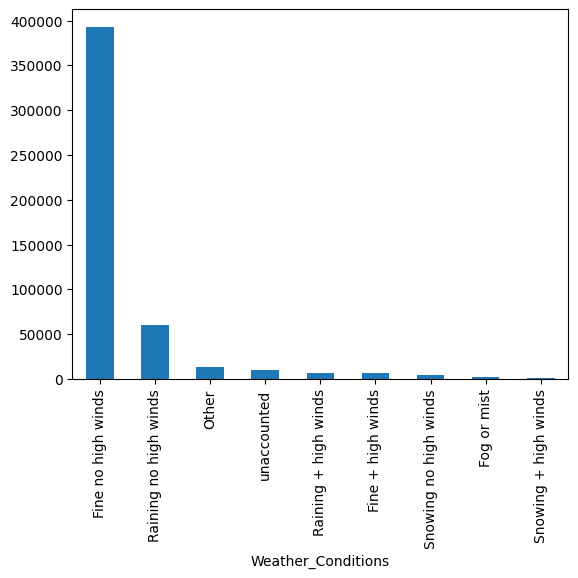

In [54]:
weather = car_accidents['Weather_Conditions'].value_counts()
weather.plot(kind='bar')
plt.show()


<h1>INSIGHT #5</h1>

<h3>What vehicle type has the highest number of Fatal, Serious, and Slight accidents?</h3>

<h3 style="background-color:yellow;">Cars have the highest number of Fatal, Serious, and Slight accidents, indicating that they are the most frequently involved vehicle type in road accidents.</h3>

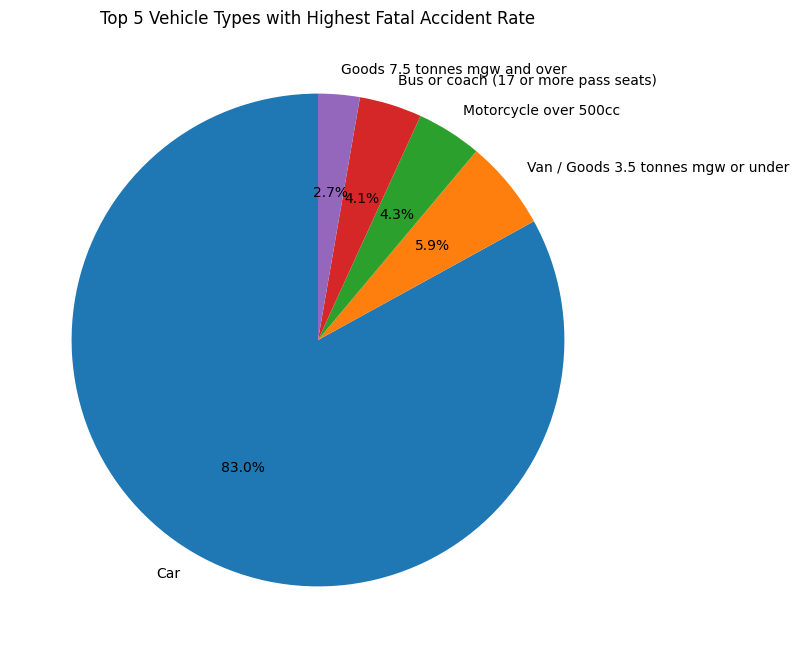

In [59]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']

fatal_vehicle = fatal_accidents['Vehicle_Type'].value_counts()
fatal_acc = fatal_vehicle.head(5)

plt.figure(figsize=(8, 8)) 
plt.pie(fatal_acc, labels=fatal_acc.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Vehicle Types with Highest Fatal Accident Rate')
plt.show()


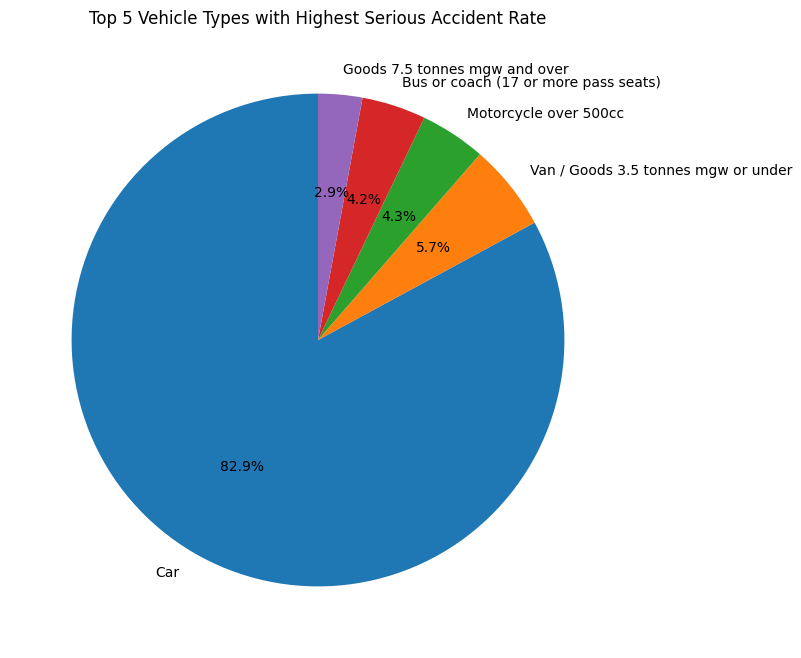

In [61]:
serious_accidents = accident[accident['Accident_Severity'] == 'Serious']
serious_vehicle = serious_accidents['Vehicle_Type'].value_counts()
serious_acc = serious_vehicle.head(5)

plt.figure(figsize=(8, 8)) 
plt.pie(serious_acc, labels=serious_acc.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Vehicle Types with Highest Serious Accident Rate')
plt.show()



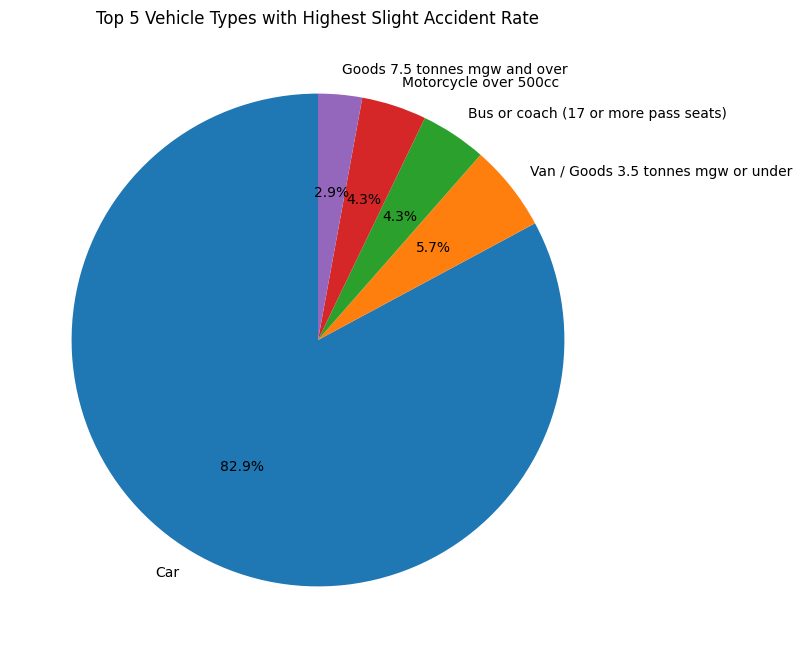

In [60]:
slight_accidents = accident[accident['Accident_Severity'] == 'Slight']
slight_vehicle = slight_accidents['Vehicle_Type'].value_counts()
slight_acc = slight_vehicle.head(5)

plt.figure(figsize=(8, 8)) 
plt.pie(slight_acc, labels=slight_acc.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Vehicle Types with Highest Slight Accident Rate')
plt.show()


<h1>INSIGHT #6</h1>

<h3>What year got the highest record of Accidents</h3>

<h3 style="background-color:yellow;">2019 got the Higher number or count of Accidents</h3>

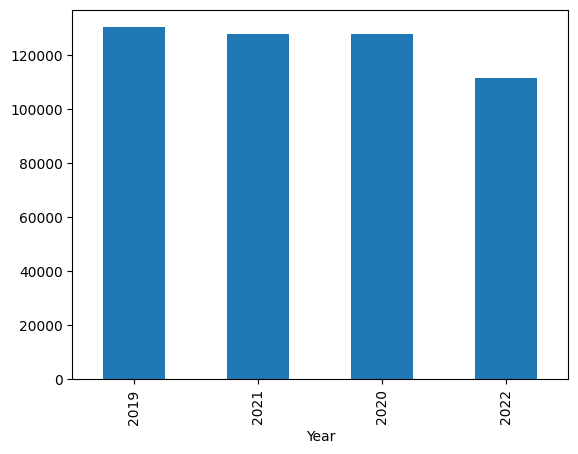

In [62]:
car_yr = car_accidents['Year'].value_counts()
car_yr.plot(kind='bar')
plt.show()


<h1>INSIGHT #7</h1>

<h3>What Year got the highest record of Fatal accidents?</h3>

<h3 style="background-color:yellow;">In Year 2019, It has the highest record of Fatal accidents</h3>




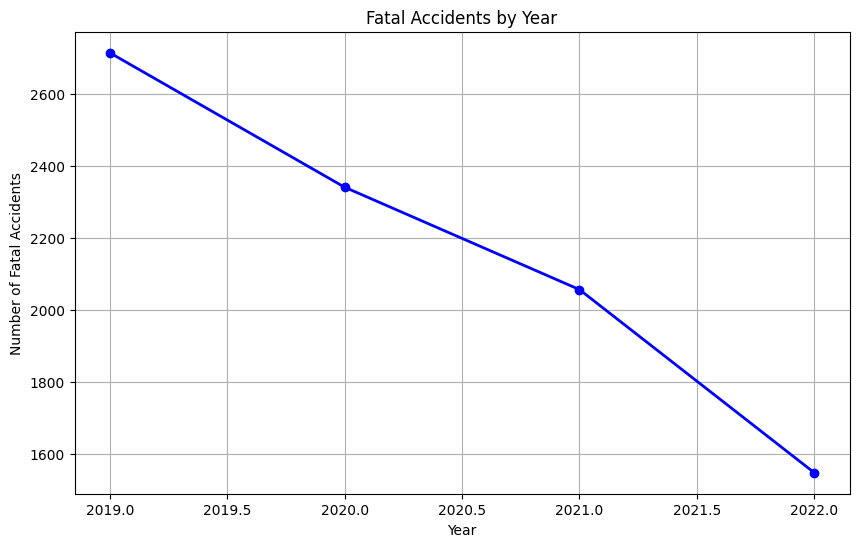

In [63]:
fatal_yr = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Year').size()
fatal_yr.plot(kind='line', figsize=(10, 6), marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Fatal Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.grid(True)
plt.show()


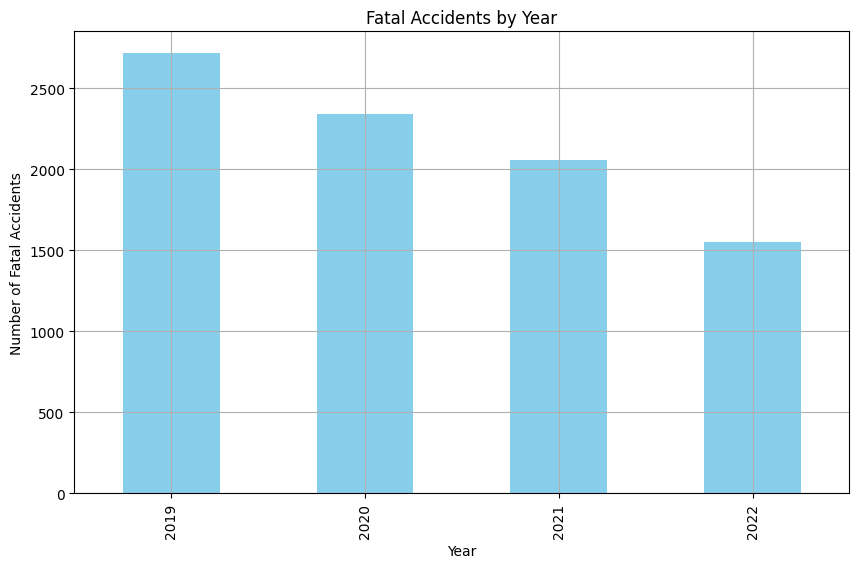

In [66]:
fatal_yr = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Year').size()
fatal_yr.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Fatal Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.grid()
plt.show()

<h1>INSIGHT #8</h1>

<h3>Which District Area has the highest number of recorded accidents?</h3>

<h3 style="background-color:yellow;">The results show that Birmingham has the highest number of recorded accidents.</h3>


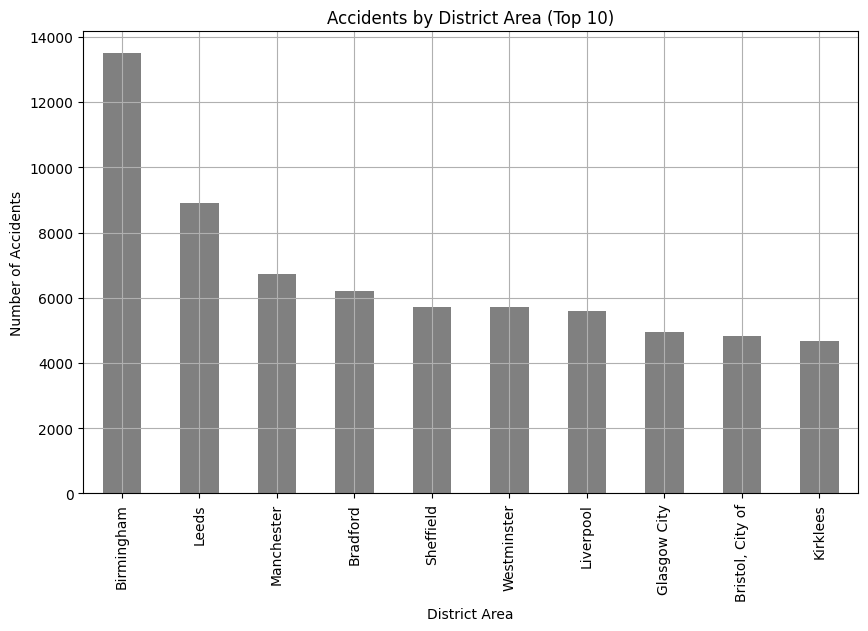

In [133]:
district_area = accident['District Area'].value_counts()
district_area.head(10).plot(kind='bar', figsize=(10, 6), color='grey')
plt.title('Accidents by District Area (Top 10)')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()


<h1>INSIGHT #9</h1>

<h3>Which accident severity has the highest record?</h3>

<h3 style="background-color:yellow;">Among all recorded accidents, Slight accidentshave the highest occurrence. This indicates that while accidents are frequent, most of them result in minor injuries or damage rather than severe or fatal outcomes. </h3>

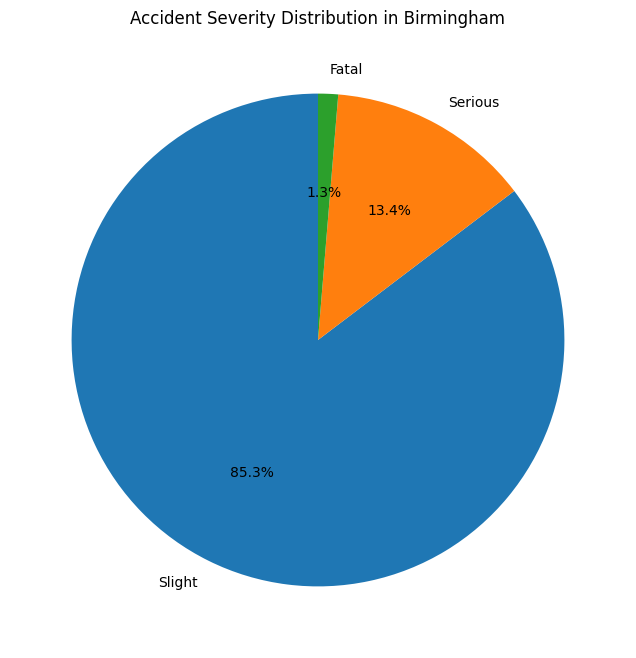

In [77]:
birmingham_sev= accident["Accident_Severity"].value_counts()
plt.figure(figsize=(8, 8))
birmingham_sev.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Accident Severity Distribution in Birmingham')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()

<h1>INSIGHT #10</h1>

<h3>On what day got of week has the highest count od accidents</h3>

<h3 style="background-color:yellow;">Accidents occur more frequently on weekends, especially on Saturdays, which have the highest recorded number of accidents. This trend could be due to increased travel, social activities, and higher traffic volumes during the weekend, leading to a greater risk of collisions.</h3>

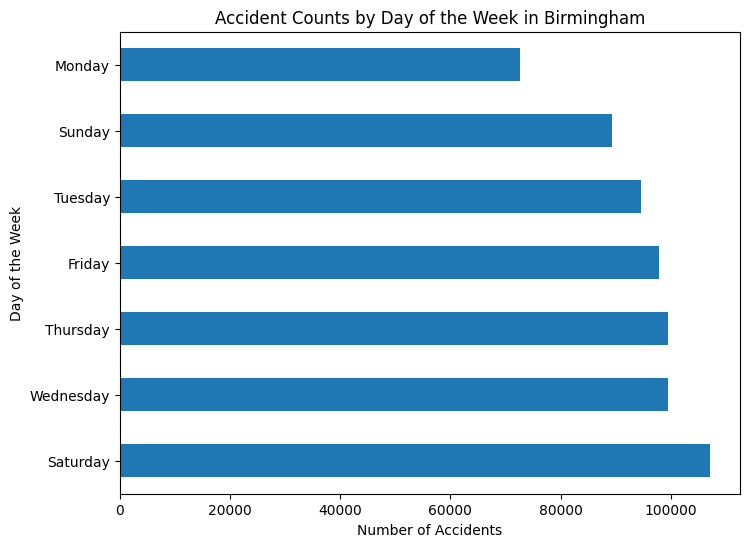

In [80]:
birm_dw = accident["DayofWeek"].value_counts()
week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}

birm_dw.index = birm_dw.index.map(week)
plt.figure(figsize=(8, 6))
birm_dw.plot(kind='barh')
plt.title('Accident Counts by Day of the Week in Birmingham')
plt.xlabel('Number of Accidents')
plt.ylabel('Day of the Week')
plt.show()



<h1>INSIGHT #11</h1>

<h3>How many vehicles are usually involved in accidents?</h3>

<h3 style="background-color:yellow;">Most accidents involved two vehicles.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\2705122585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehi.index, y=vehi.values, palette="viridis")


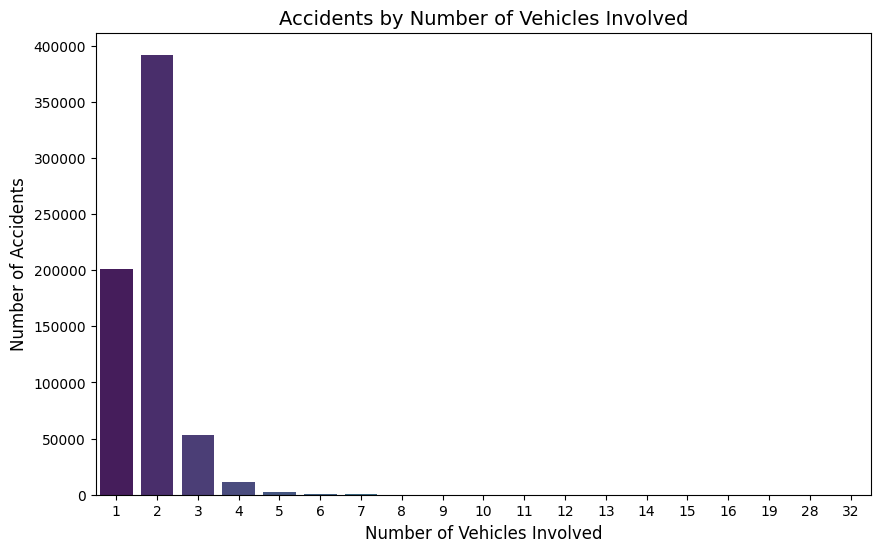

In [132]:
vehi = accident["Number_of_Vehicles"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=vehi.index, y=vehi.values, palette="viridis")

plt.xlabel("Number of Vehicles Involved", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Number of Vehicles Involved", fontsize=14)

plt.show()


<h1>INSIGHT #12</h1>

<h3>Two vehicles are commonly involved in accidents. What is the percentage distribution of Fatal, Serious, and Slight accidents when two vehicles are involved?</h3>

<h3 style="background-color:yellow;">Out of 391,995 accidents involving two vehicles, most were Slight at 88.5%, followed by Serious at 10.6%, while Fatal accidents had the lowest percentage at 0.9%.</h3>


C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\4190731898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")


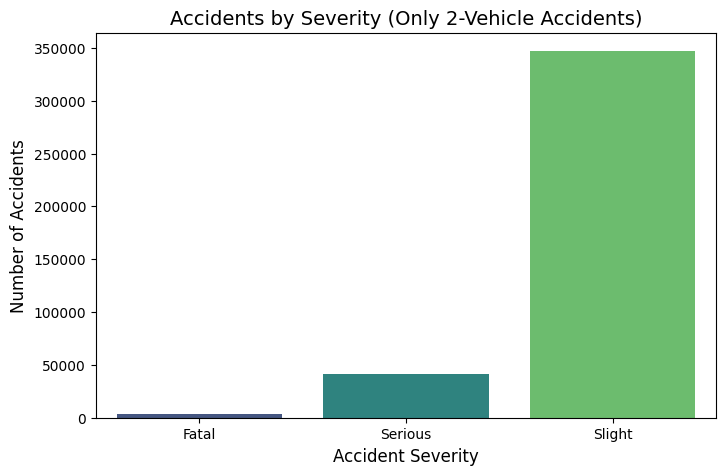

In [131]:
vehicle_accidents = accident[accident["Number_of_Vehicles"] == 2]
severity_counts = vehicle_accidents["Accident_Severity"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")

plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Severity (Only 2-Vehicle Accidents)", fontsize=14)

plt.show()



<h1>INSIGHT #13</h1>

<h3>How does accident severity vary between urban and rural areas?</h3>

<h3  style="background-color: yellow">Rural areas have more fatal accidents than urban areas, even though urban areas have more total crashes. This may be due to higher speeds, fewer traffic controls, and longer emergency response times in rural locations.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\1230897961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ur_severity = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts().unstack()


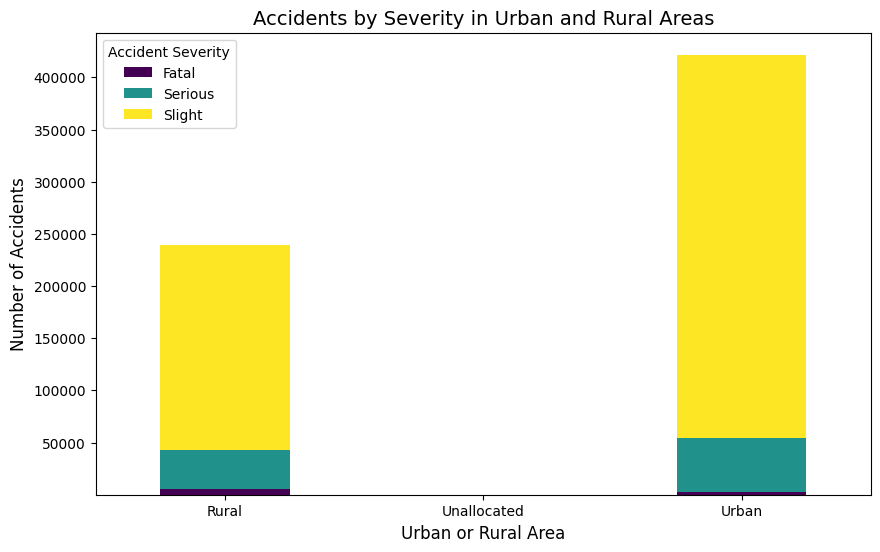

In [130]:
ur_severity = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts().unstack()
ur_severity.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Urban or Rural Area", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Severity in Urban and Rural Areas", fontsize=14)
plt.legend(title="Accident Severity")
plt.xticks(rotation=0)

plt.show()



<h1>INSIGHT #14</h1>

<h3>How do road surface conditions impact accidents in urban and rural areas?</h3>

<h3  style="background-color: yellow">Most accidents happen on dry roads, but wet or damp conditions also cause many crashes. Rural areas have more accidents on icy roads than urban areas, likely due to less road maintenance. This shows the importance of extra caution in bad weather, especially in rural areas.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\2178703715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ruban_sur = accident.groupby('Urban_or_Rural_Area')['Road_Surface_Conditions'].value_counts().unstack()


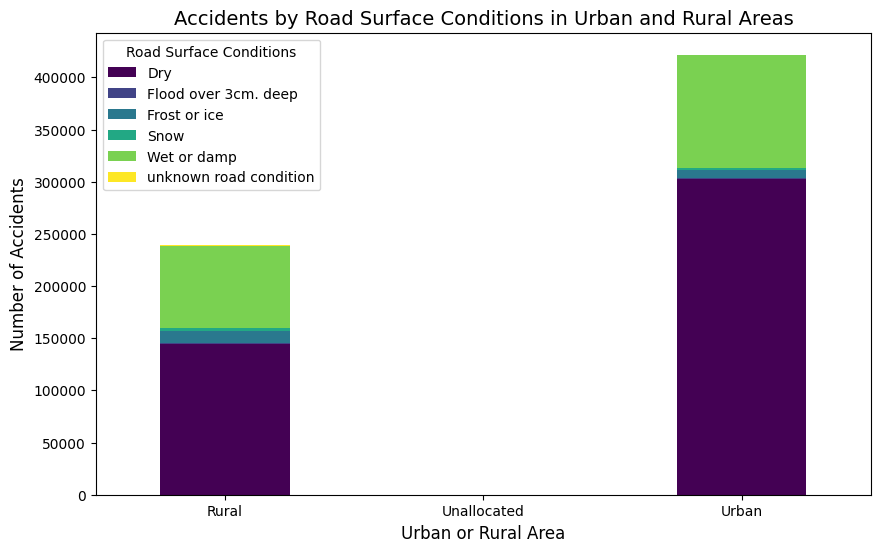

In [129]:
ruban_sur = accident.groupby('Urban_or_Rural_Area')['Road_Surface_Conditions'].value_counts().unstack()
ruban_sur.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Urban or Rural Area", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Road Surface Conditions in Urban and Rural Areas", fontsize=14)
plt.legend(title="Road Surface Conditions")
plt.xticks(rotation=0)

plt.show()


<h1>INSIGHT #15</h1>

<h3>How do light conditions impact accident severity?</h3>

<h3 style="background-color:yellow">Most fatal accidents happen in daylight, but many also occur in total darkness without lighting. Serious and slight accidents are more common in well-lit areas due to higher traffic. While lighting helps visibility, it doesn’t prevent accidents, and poor lighting increases severe crash risks.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\1607343895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sev_light_casual = accident.groupby(['Accident_Severity', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()


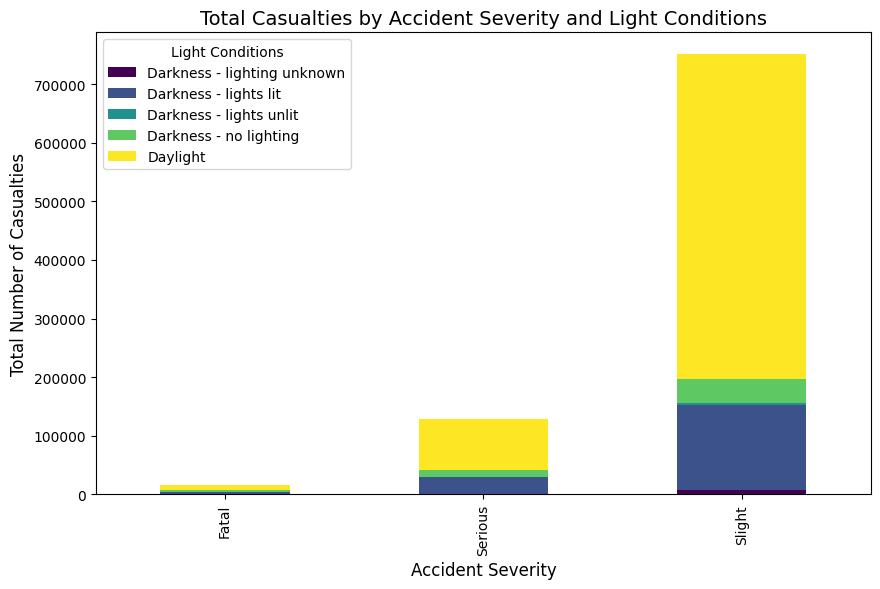

In [128]:
sev_light_casual = accident.groupby(['Accident_Severity', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()
sev_light_casual.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Total Number of Casualties", fontsize=12)
plt.title("Total Casualties by Accident Severity and Light Conditions", fontsize=14)
plt.legend(title="Light Conditions")

plt.show()



<h1>INSIGHT #16</h1>

<h3> How do accident counts vary across different months and years?</h3>

<h3 style="background-color:yellow">November had the most accidents each year, with 2019 having the highest count (16,559). Accidents peak in late autumn and summer, possibly due to weather and travel patterns. Overall accident numbers dropped from 2019 to 2022, likely due to new regulations, COVID-19 restrictions, or better safety measures. </h3>

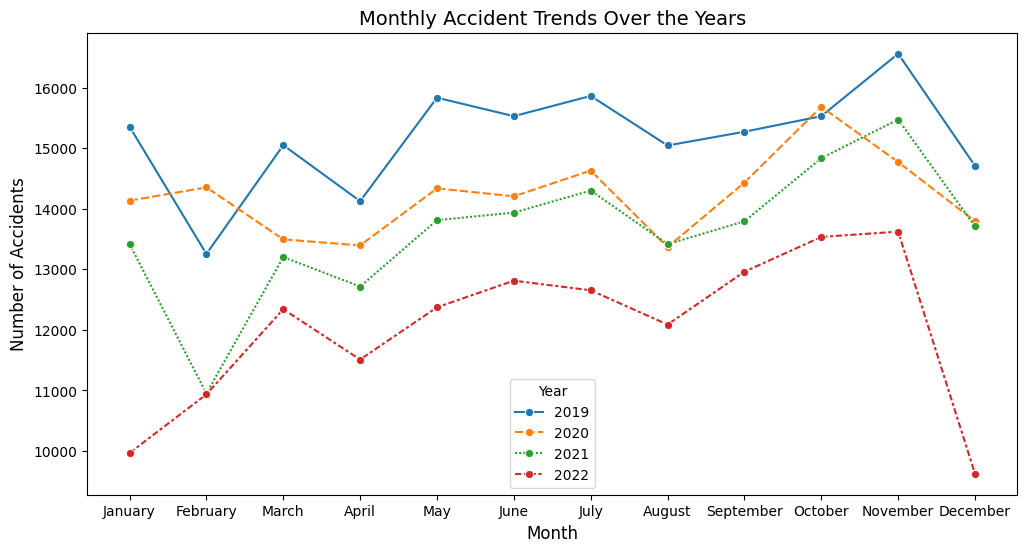

In [125]:
mont_yr = accident.groupby(['Year'])['Month'].value_counts().reset_index(name='Count')
mon = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
mont_yr['Month'] = mont_yr['Month'].map(mon)
mon_sorted = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
mont_yr_pivot = mont_yr.pivot(index="Month", columns="Year", values="Count").reindex(mon_sorted)
plt.figure(figsize=(12, 6))
sns.lineplot(data=mont_yr_pivot, marker="o")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Monthly Accident Trends Over the Years", fontsize=14)
plt.legend(title="Year")
plt.show()



<h1>INSIGHT #17</h1>

<h3>How do different light conditions affect the number of accidents?</h3>

<h3 style="background-color:yellow">Most accidents happen in daylight due to heavy traffic, while many also occur in well-lit dark areas. Fewer accidents happen in places with no lighting, but the risk is higher due to poor visibility. </h3>

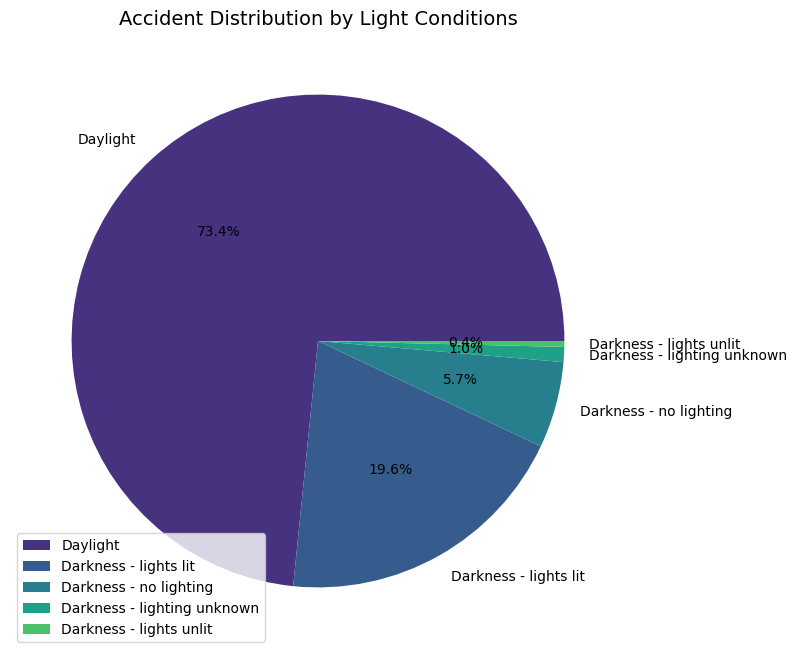

In [122]:
light_counts = accident['Light_Conditions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(light_counts, labels=light_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Accident Distribution by Light Conditions", fontsize=14)
plt.legend()
plt.show()


<h1>INSIGHT #18</h1>

<h3>How does the number of accidents vary based on Light Conditions for each Month?</h3>

<h3 style="background-color: yellow">Accidents happen more during daylight, but they rise in winter (October to December) due to shorter days and lower visibility. This shows that darkness plays a big role in increasing accident risks.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\90772629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_light = accident.groupby(['Month', 'Light_Conditions']).size().reset_index(name='Count')


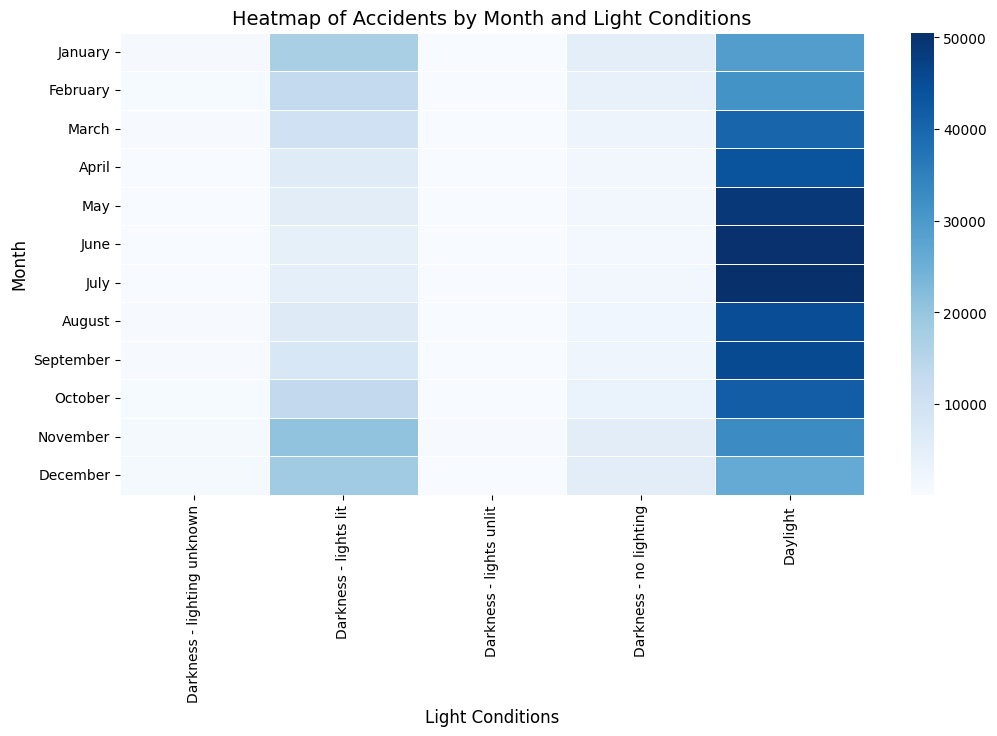

In [114]:
month_light = accident.groupby(['Month', 'Light_Conditions']).size().reset_index(name='Count')

mon = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


month_light['Month'] = month_light['Month'].map(mon)
month_light_pivot = month_light.pivot(index="Month", columns="Light_Conditions", values="Count").fillna(0)
mon_sorted = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_light_pivot = month_light_pivot.reindex(mon_sorted)

plt.figure(figsize=(12, 6))
sns.heatmap(month_light_pivot, cmap="Blues",linewidths=0.5)
plt.xlabel("Light Conditions", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.title("Heatmap of Accidents by Month and Light Conditions", fontsize=14)
plt.show()


<h1>INSIGHT #19</h1>

<h3>How do weather conditions affect accidents on different road types?</h3>

<h3 style="background-color: yellow">Most accidents happen on single carriageways, especially in good weather, due to high traffic. Rain and fog make roads slippery and reduce visibility, increasing risks. Snow-related accidents are fewer but still common on single carriageways.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\2444916008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_road = accident.groupby(['Weather_Conditions', 'Road_Type']).size().reset_index(name='Count')


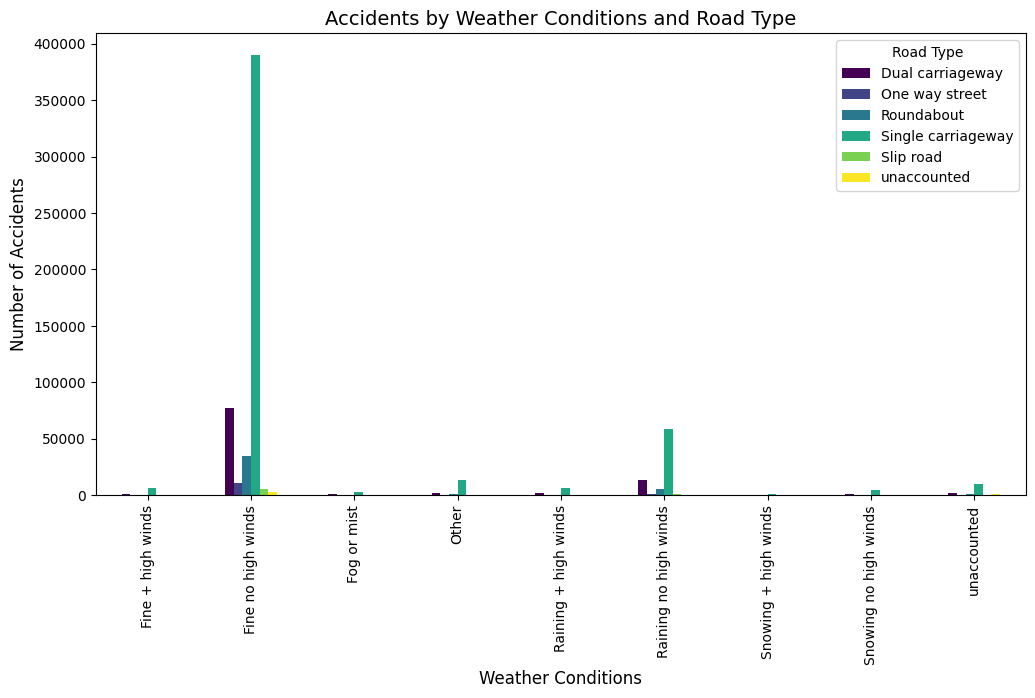

In [109]:
weather_road = accident.groupby(['Weather_Conditions', 'Road_Type']).size().reset_index(name='Count')
weather_road_pivot = weather_road.pivot(index="Weather_Conditions", columns="Road_Type", values="Count")
weather_road_pivot.plot(kind="bar", figsize=(12, 6), colormap="viridis")

plt.xlabel("Weather Conditions", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Weather Conditions and Road Type", fontsize=14)
plt.legend(title="Road Type")

plt.show()


<h1>INSIGHT #20</h1>

<h3>How does road surface condition impact the severity of accidents?</h3>

<h3 style="background-color:yellow">Most accidents happen on dry roads, but crashes are more severe on wet, icy, or snowy roads. Poor weather increases the risk of serious or fatal accidents, so careful driving and road maintenance are important.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_9004\2075900823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Count')


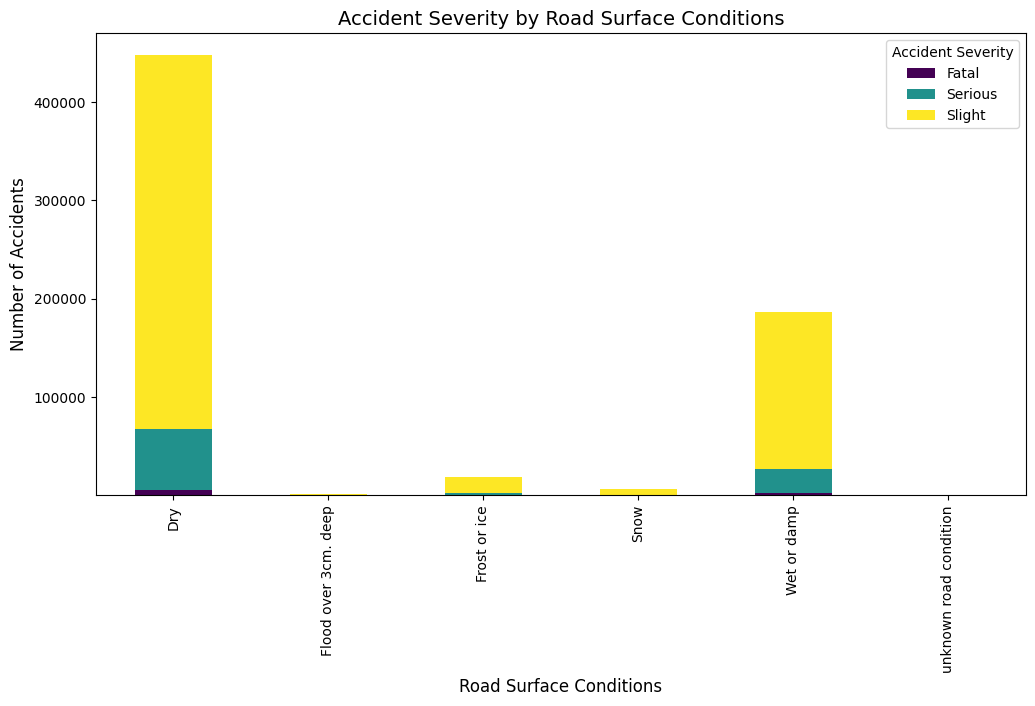

In [101]:
road_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
road_severity_pivot = road_severity.pivot(index="Road_Surface_Conditions", columns="Accident_Severity", values="Count").fillna(0)
road_severity_pivot.plot(kind="bar", figsize=(12, 6), colormap="viridis", stacked =True)

plt.xlabel("Road Surface Conditions", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accident Severity by Road Surface Conditions", fontsize=14)
plt.legend(title="Accident Severity")
plt.show()
